# 1. Cargar datos preparados y separar target

In [99]:
import pandas as pd

df = pd.read_csv('Datasets/datos_preparados.csv')

X = df.drop('target',axis=1)
y = df['target']

print(X.shape)
print(y.shape)

(4401, 69)
(4401,)


# 2. Selección manual

In [100]:
#Dataframe sin dummies
df2 = pd.read_csv('Datasets/datos_limpios.csv').drop(['attrition','employee_id'], axis=1)


De las variables "Años trabajando", "Años bajo el mando del mismo jefe", "Años desde la última promoción" y "Años en la empresa", incluir solo una de estas, ya que presentan una alta correlación entre ellas. Se deja solo "Años en la empresa".

In [101]:
df_manual = df2.drop(['years_since_last_promotion', 'total_working_years', 'years_with_curr_manager'], axis=1)

Excluir también las variables categóricas que no presentan correlación con la variable objetivo.

In [102]:
df_manual = df_manual.drop(['stock_option_level', 'gender', 'education', 'job_level', 'performance_rating'], axis=1)

Excluir variable numéricas que no presentan correlación con la variable objetivo.

In [103]:
df_manual = df_manual.drop(['distance_from_home', 'percent_salary_hike', 'training_times_last_year'], axis=1)

In [104]:
df_manual = pd.get_dummies(df_manual)

# 3. Variance Threshold

In [105]:
from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(X,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(X)
    new_cols = var_thres.get_support()
    return new_cols

In [106]:
# Obtener columnas seleccionadas
X_new = variance_threshold(X, 0.20)
# Nuevo dataframe
df_vth = X.iloc[:,X_new]
df_vth.head()

,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager,...,marital_status_Married,marital_status_Single,stock_option_level_0,stock_option_level_1,environment_satisfaction_Alto,environment_satisfaction_Muy alto,job_satisfaction_Alto,job_satisfaction_Muy alto,work_life_balance_Muy buena,job_involvement_Alto
0,51,6,131160.0,1.0,11,1.0,6,1.0,0.0,0,...,True,False,True,False,True,False,False,True,False,True
1,31,10,41890.0,0.0,23,6.0,3,5.0,1.0,4,...,False,True,False,True,True,False,False,False,False,False
2,32,17,49185.0,1.0,15,5.0,2,5.0,0.0,3,...,True,False,False,False,False,False,False,False,False,True
3,38,2,83210.0,3.0,11,13.0,5,8.0,7.0,5,...,True,False,False,False,False,True,False,True,True,False
4,32,10,23420.0,4.0,12,9.0,2,6.0,0.0,4,...,False,True,False,False,False,True,False,False,True,True


In [107]:
# Obtener columnas seleccionadas
X_new = variance_threshold(X, 0.25)
# Nuevo dataframe
df_vth2 = X.iloc[:,X_new]
df_vth2.head()

,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager,mean_time
0,51,6,131160.0,1.0,11,1.0,6,1.0,0.0,0,6.8702
1,31,10,41890.0,0.0,23,6.0,3,5.0,1.0,4,7.3160
2,32,17,49185.0,1.0,15,5.0,2,5.0,0.0,3,6.8161
3,38,2,83210.0,3.0,11,13.0,5,8.0,7.0,5,6.7892
4,32,10,23420.0,4.0,12,9.0,2,6.0,0.0,4,7.8776


# 4. SelectKBest

In [108]:
# Para clasificación
from sklearn.feature_selection import SelectKBest, f_classif,chi2

# Función de filtro de caracteristicas - stadis. scores
def select_kbest_classification(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [109]:
# Obtener columnas seleciconadas - (30 caracteristicas)
X_new = select_kbest_classification(X, y, f_classif, 30)
# Nuevo conjunto de datos
df_anova = X.iloc[:,X_new]
df_anova.head()

Scores:
 [1.14674021e+02 3.26032102e-01 1.85064922e+00 7.97752451e+00
 4.82372552e+00 1.56475671e+02 1.03410179e+01 1.41173445e+02
 3.27914499e+00 1.09151201e+02 1.79738311e+02 2.43502944e+01
 5.84619038e+01 1.06625482e+01 2.73403550e+01 9.79276958e-01
 1.61003664e+00 2.56629853e-01 8.01023620e-01 2.93364724e-01
 2.83997308e-01 5.67347842e+00 3.73402097e+01 7.06112748e-01
 5.91701394e-02 4.20378146e-04 2.95553067e+00 7.26231807e+00
 1.51276719e+00 1.51276719e+00 8.15091699e-01 5.06978567e+00
 1.12550347e+00 1.32294557e-03 1.51121020e+00 8.23515065e-01
 8.39184899e-01 1.10559621e-03 1.38338151e+00 8.87092588e+00
 1.00409332e+01 3.37123487e+00 5.62906949e-01 4.93832845e-01
 3.35925584e+01 3.68383474e+01 1.38798269e+02 1.28457502e+00
 2.62603388e+00 1.06608136e+00 1.33260451e-01 7.55391461e+00
 6.52922036e+01 1.16763561e+00 1.01058983e+01 2.57592067e-01
 3.68278854e+01 4.35373689e-02 3.43361407e+01 4.41849999e-01
 1.12269180e+00 4.40242180e+01 1.86114692e+01 3.27461546e+00
 6.41366201e+00

,age,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_with_curr_manager,mean_time,business_travel_Non_Travel,business_travel_Travel_Frequently,...,marital_status_Married,marital_status_Single,environment_satisfaction_Alto,environment_satisfaction_Bajo,environment_satisfaction_Muy alto,job_satisfaction_Bajo,job_satisfaction_Muy alto,work_life_balance_Mala,work_life_balance_Muy buena,job_involvement_Bajo
0,51,1.0,11,1.0,6,1.0,0,6.8702,False,False,...,True,False,True,False,False,False,True,False,False,False
1,31,0.0,23,6.0,3,5.0,4,7.3160,False,True,...,False,True,True,False,False,False,False,False,False,False
2,32,1.0,15,5.0,2,5.0,3,6.8161,False,True,...,True,False,False,False,False,False,False,True,False,False
3,38,3.0,11,13.0,5,8.0,5,6.7892,True,False,...,True,False,False,False,True,False,True,False,True,False
4,32,4.0,12,9.0,2,6.0,4,7.8776,False,False,...,False,True,False,False,True,True,False,False,True,False


In [110]:
# Obtener columnas seleciconadas - (30 caracteristicas)
X_new = select_kbest_classification(X, y, chi2, 30)
# Nuevo conjunto de datos
df_chi2 = X.iloc[:,X_new]
df_chi2.head()

Scores:
 [2.52902718e+02 2.32942732e+00 5.51997097e+04 1.83980234e+01
 4.24352197e+00 7.16106872e+02 6.12232584e+00 4.82032482e+02
 9.78900381e+00 3.28957950e+02 4.18613543e+01 2.17555376e+01
 4.68486158e+01 3.09019941e+00 2.60226070e+01 3.39187526e-01
 1.12138141e+00 2.48331338e-01 4.89738860e-01 2.14057278e-01
 2.51184858e-01 4.58033708e+00 3.63609864e+01 4.15510913e-01
 5.27802919e-02 2.87833338e-04 2.78972149e+00 6.60096512e+00
 9.07554551e-01 6.05380138e-01 5.14455631e-01 3.22554822e+00
 9.58696972e-01 1.22791206e-03 1.44029075e+00 7.50177449e-01
 8.09652296e-01 9.11570003e-04 1.28737585e+00 7.98768962e+00
 9.47833429e+00 2.69936411e+00 4.38087473e-01 4.66164492e-01
 2.59413257e+01 1.98233408e+01 9.15167215e+01 7.33328131e-01
 1.56131634e+00 9.51705615e-01 1.25592429e-01 5.19244920e+00
 5.20226629e+01 9.41503028e-01 7.03430639e+00 1.80520537e-01
 2.93986930e+01 3.52630393e-02 2.33588875e+01 3.39665064e-01
 1.00707749e+00 4.12396571e+01 7.21268392e+00 1.34041094e+00
 6.04763911e+00

,age,monthly_income,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager,mean_time,...,marital_status_Married,marital_status_Single,environment_satisfaction_Alto,environment_satisfaction_Bajo,environment_satisfaction_Muy alto,job_satisfaction_Bajo,job_satisfaction_Muy alto,work_life_balance_Mala,work_life_balance_Muy buena,job_involvement_Bajo
0,51,131160.0,1.0,11,1.0,6,1.0,0.0,0,6.8702,...,True,False,True,False,False,False,True,False,False,False
1,31,41890.0,0.0,23,6.0,3,5.0,1.0,4,7.3160,...,False,True,True,False,False,False,False,False,False,False
2,32,49185.0,1.0,15,5.0,2,5.0,0.0,3,6.8161,...,True,False,False,False,False,False,False,True,False,False
3,38,83210.0,3.0,11,13.0,5,8.0,7.0,5,6.7892,...,True,False,False,False,True,False,True,False,True,False
4,32,23420.0,4.0,12,9.0,2,6.0,0.0,4,7.8776,...,False,True,False,False,True,True,False,False,True,False


# 5. RFE

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [112]:
# Establecer Estimador
model = LogisticRegression(max_iter=1000,random_state=24)
# Obtener columnas seleccionadas - (30 caracteristicas)
X_new = recursive_feature_selection(X, y, model, 30)
# Nuevo conjunto de datos
df_log = X.iloc[:,X_new]
df_log.head()

Num Features: 30
Selected Features: [False False False False False False False False False False  True  True
  True False  True  True  True False False False False  True  True False
 False False  True  True False False False  True False False  True False
  True  True False  True  True  True  True False  True  True  True False
  True False False False  True False  True False  True False  True False
 False  True  True  True  True False False False False]
Feature Ranking: [30 39 40 11 37 12  3 18 16 25  1  1  1 22  1  1  1  9 31 33 27  1  1 14
 19 38  1  1 13 23 17  1 35 28  1 26  1  1  5  1  1  1  1 10  1  1  1 20
  1 15  2  6  1  7  1 24  1 36  1  4  8  1  1  1  1 32 29 34 21]


,mean_time,business_travel_Non_Travel,business_travel_Travel_Frequently,department_Human Resources,department_Research & Development,department_Sales,education_Universitario,education_field_Human Resources,education_field_Other,education_field_Technical Degree,...,marital_status_Single,stock_option_level_1,environment_satisfaction_Bajo,environment_satisfaction_Muy alto,job_satisfaction_Bajo,job_satisfaction_Muy alto,work_life_balance_Mala,work_life_balance_Muy buena,job_involvement_Alto,job_involvement_Bajo
0,6.8702,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,7.3160,False,True,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,6.8161,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,6.7892,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4,7.8776,False,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,False,True,True,False


In [113]:
# Establecer Estimador
model = RandomForestClassifier(n_estimators=300,random_state=24)
# Obtener columnas seleciconadas - (30 caracteristicas)
X_new = recursive_feature_selection(X, y, model, 30)
# Nuevo conjunto de datos
df_ranfor = X.iloc[:,X_new]
df_ranfor.head()

Num Features: 30
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True False
  True False False  True False False  True False False False False  True
 False False False False False  True  True  True False False False False
 False False False False False False  True False False  True  True  True
  True False False False  True False  True  True  True False  True False
 False False  True  True False False False False False]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1  1 31  1  7 14  1  9 40  1 10 23  8 27  1
 28  6 37 36  3  1  1  1 18 30 39 32 38 16 35 34 20 11  1 29 13  1  1  1
  1 22 33  4  1 19  1  1  1 15  1 12 24  2  1  1 25  5 17 21 26]


,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager,...,marital_status_Single,stock_option_level_0,stock_option_level_1,environment_satisfaction_Bajo,environment_satisfaction_Muy alto,job_satisfaction_Alto,job_satisfaction_Bajo,job_satisfaction_Muy alto,work_life_balance_Muy buena,job_involvement_Alto
0,51,6,131160.0,1.0,11,1.0,6,1.0,0.0,0,...,False,True,False,False,False,False,False,True,False,True
1,31,10,41890.0,0.0,23,6.0,3,5.0,1.0,4,...,True,False,True,False,False,False,False,False,False,False
2,32,17,49185.0,1.0,15,5.0,2,5.0,0.0,3,...,False,False,False,False,False,False,False,False,False,True
3,38,2,83210.0,3.0,11,13.0,5,8.0,7.0,5,...,False,False,False,False,True,False,False,True,True,False
4,32,10,23420.0,4.0,12,9.0,2,6.0,0.0,4,...,True,False,False,False,True,False,True,False,True,True


# 6. Select From model

In [114]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier

# Selector de variables con Ridge
sel_ = SelectFromModel(RidgeClassifier(alpha=0.1,random_state=24), max_features=30)
sel_.fit(X, y)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()

df_ridge = X.iloc[:,X_new]
df_ridge.head()

[[-6.99331594e-03 -7.84264695e-04 -1.03785765e-07  2.59951636e-02
   4.56601675e-03 -1.09785962e-02 -2.96420802e-02 -1.18212188e-02
   2.27607839e-02 -7.20751955e-03  1.09970811e-01 -1.45266184e-01
   1.71027204e-01 -2.57610201e-02  1.11603166e-01 -5.52713024e-02
  -5.63318634e-02 -6.45421509e-02 -9.07841798e-03 -3.97773776e-03
   2.21690046e-02  5.54293020e-02  2.03124366e-01  9.02033084e-03
  -3.85744601e-02 -1.91964760e-02 -8.59702707e-02 -6.84034899e-02
  -6.60052997e-03  6.60052997e-03  2.41715345e-02  5.49087703e-02
  -1.79648653e-03 -1.01183705e-02 -6.71654478e-02 -4.03054996e-02
  -1.12140632e-02  2.34732004e-02 -3.89799712e-02 -1.11029572e-01
   1.57043365e-01  3.31997851e-02  4.89752538e-02 -6.11624986e-02
  -9.12792223e-02 -6.62322287e-02  1.57511451e-01  1.72094217e-02
  -2.92382805e-02  2.49448754e-02 -1.29160166e-02 -4.12839705e-02
   1.71858931e-01 -3.43888039e-02 -9.61861569e-02  1.37620684e-03
   1.32520869e-01 -1.46520253e-02 -1.19245050e-01 -5.38122191e-02
  -3.65486

,mean_time,business_travel_Non_Travel,business_travel_Travel_Frequently,department_Human Resources,department_Research & Development,department_Sales,education_Doctor,education_Universitario,education_field_Human Resources,education_field_Other,...,marital_status_Married,marital_status_Single,environment_satisfaction_Bajo,environment_satisfaction_Muy alto,job_satisfaction_Bajo,job_satisfaction_Muy alto,work_life_balance_Buena,work_life_balance_Mala,work_life_balance_Muy buena,job_involvement_Bajo
0,6.8702,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1,7.3160,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,6.8161,False,True,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
3,6.7892,True,False,False,True,False,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
4,7.8776,False,False,False,True,False,False,False,False,False,...,False,True,False,True,True,False,False,False,True,False


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

# Selector de variables con Lasso
sel_ = SelectFromModel(GradientBoostingClassifier(n_estimators=300,random_state=24))
sel_.fit(X, y)
print(sel_.estimator_.feature_importances_)
#Obtener variables seleccionadas
X_new = sel_.get_support()

df_gb = X.iloc[:,X_new]
df_gb.head()

[0.10401526 0.03787741 0.08244816 0.04088604 0.0267724  0.08512643
 0.02665626 0.05513782 0.04018762 0.06221201 0.13383995 0.00364211
 0.02502195 0.         0.00832794 0.00016459 0.00317739 0.00081577
 0.         0.0009833  0.0026236  0.00429578 0.0076358  0.00632725
 0.00048739 0.00238025 0.00047639 0.00216547 0.00059716 0.00214205
 0.00311649 0.00505224 0.00266181 0.00313631 0.00246332 0.00023794
 0.00710266 0.00062837 0.00314921 0.00559889 0.00782621 0.00258533
 0.00591841 0.00454272 0.00860333 0.00230796 0.03527031 0.00353724
 0.00272651 0.00457232 0.0027012  0.00290606 0.03132978 0.00177866
 0.00933774 0.00249808 0.02037487 0.0016294  0.01521114 0.0029059
 0.00326307 0.01187225 0.00486189 0.00229819 0.00214221 0.00183657
 0.00503291 0.00019363 0.00036537]


,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager,mean_time,business_travel_Travel_Frequently,marital_status_Single,environment_satisfaction_Bajo,job_satisfaction_Bajo,job_satisfaction_Muy alto
0,51,6,131160.0,1.0,11,1.0,6,1.0,0.0,0,6.8702,False,False,False,False,True
1,31,10,41890.0,0.0,23,6.0,3,5.0,1.0,4,7.3160,True,True,False,False,False
2,32,17,49185.0,1.0,15,5.0,2,5.0,0.0,3,6.8161,True,False,False,False,False
3,38,2,83210.0,3.0,11,13.0,5,8.0,7.0,5,6.7892,False,False,False,False,True
4,32,10,23420.0,4.0,12,9.0,2,6.0,0.0,4,7.8776,False,True,False,True,False


# Modelos 

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Regresión logística

In [126]:
def regresionLogistica (df,y):
    X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.2, random_state=42)

    num = df.select_dtypes(include=[float,int]).columns
    pipeline = ColumnTransformer([('num',StandardScaler(),num)],remainder='passthrough')
    X_train_std = pipeline.fit_transform(X_train)
    X_test_std = pipeline.transform(X_test)

    lr = LogisticRegression(max_iter=1000,class_weight="balanced", random_state=42).fit(X_train_std,y_train)
    y_pred_train = lr.predict(X_train_std)
    y_pred_test = lr.predict(X_test_std)
    y_pred_prob_train = lr.predict_proba(X_train_std)
    y_pred_prob_test = lr.predict_proba(X_test_std)
    mc_train=confusion_matrix(y_train,y_pred_train)
    mc_test=confusion_matrix(y_test,y_pred_test)
    tn, fp, fn, tp = mc_train.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    especificidad = tn / (fp + tn)
    f1_score = 2*(precision*recall)/(precision+recall)
    print('-'*30,'TRAIN','-'*30)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Especificidad: {especificidad}')
    print(f'F1 score: {f1_score}')
    print('Train score: ',lr.score(X_train_std,y_train))

    tn, fp, fn, tp = mc_test.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    especificidad = tn / (fp + tn)
    f1_score = 2*(precision*recall)/(precision+recall)
    accuracy = lr.score(X_test_std,y_test)
    print('-'*30,'TEST','-'*30)
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'Especificidad : {especificidad}')
    print(f'F1 score : {f1_score}')
    print('Test score: ',accuracy)
    
    resultados = {
        'X_train' : X_train,
        'X_test' : X_test,
        'y_train' : y_train,
        'y_test' : y_test,
        'y_pred_train' : y_pred_train,
        'y_pred_test' : y_pred_test,
        'y_pred_prob_train' : y_pred_prob_train,
        'y_pred_prob_test' : y_pred_prob_test,
        'precision' : precision,
        'recall' : recall,
        'especificidad' : especificidad,
        'f1_score' : f1_score,
        'accuracy' : accuracy
    }
    
    return resultados

### Regresión logística con todas las características

In [128]:
res_log = regresionLogistica(X,y)

------------------------------ TRAIN ------------------------------
Precision: 0.36099585062240663
Recall: 0.7767857142857143
Especificidad: 0.7398648648648649
F1 score: 0.4929178470254958
Train score:  0.7457386363636364
------------------------------ TEST ------------------------------
Precision : 0.3933333333333333
Recall : 0.7919463087248322
Especificidad : 0.7513661202185792
F1 score : 0.5256124721603563
Test score:  0.7582292849035187


### Regresión logística con selección manual

In [129]:
res_log_manual = regresionLogistica(df_manual,y)

------------------------------ TRAIN ------------------------------
Precision: 0.35132890365448505
Recall: 0.7553571428571428
Especificidad: 0.7361486486486486
F1 score: 0.4795918367346939
Train score:  0.7392045454545455
------------------------------ TEST ------------------------------
Precision : 0.36977491961414793
Recall : 0.7718120805369127
Especificidad : 0.73224043715847
F1 score : 0.5
Test score:  0.738933030646992


### Regresión logística con Variance threshold 0.20

In [130]:
res_log_vth = regresionLogistica(df_vth,y)

------------------------------ TRAIN ------------------------------
Precision: 0.3290218270008084
Recall: 0.7267857142857143
Especificidad: 0.7195945945945946
F1 score: 0.452977184195882
Train score:  0.7207386363636363
------------------------------ TEST ------------------------------
Precision : 0.3501577287066246
Recall : 0.7449664429530202
Especificidad : 0.7185792349726776
F1 score : 0.4763948497854077
Test score:  0.7230419977298524


### Regresión logística con Variance threshold 0.25

In [131]:
res_log_vth2 = regresionLogistica(df_vth2,y)

------------------------------ TRAIN ------------------------------
Precision: 0.2883480825958702
Recall: 0.6982142857142857
Especificidad: 0.6739864864864865
F1 score: 0.4081419624217119
Train score:  0.6778409090909091
------------------------------ TEST ------------------------------
Precision : 0.29577464788732394
Recall : 0.7046979865771812
Especificidad : 0.6584699453551912
F1 score : 0.41666666666666663
Test score:  0.6662883087400681


### Regresión logística con SelectKbest Anova

In [132]:
res_log_anova = regresionLogistica(df_anova,y)

------------------------------ TRAIN ------------------------------
Precision: 0.3518672199170125
Recall: 0.7571428571428571
Especificidad: 0.7361486486486486
F1 score: 0.4804532577903683
Train score:  0.7394886363636364
------------------------------ TEST ------------------------------
Precision : 0.36451612903225805
Recall : 0.7583892617449665
Especificidad : 0.7308743169398907
F1 score : 0.4923747276688452
Test score:  0.735527809307605


### Regresión logística con SelectKbest chi2

In [133]:
res_log_chi2 = regresionLogistica(df_chi2,y)

------------------------------ TRAIN ------------------------------
Precision: 0.3504132231404959
Recall: 0.7571428571428571
Especificidad: 0.7344594594594595
F1 score: 0.47909604519774013
Train score:  0.7380681818181818
------------------------------ TEST ------------------------------
Precision : 0.3770491803278688
Recall : 0.7718120805369127
Especificidad : 0.7404371584699454
F1 score : 0.5066079295154184
Test score:  0.7457434733257662


### Regresión logística con RFE logisticRegresion

In [134]:
res_log_log = regresionLogistica(df_log,y)

------------------------------ TRAIN ------------------------------
Precision: 0.3241713823767179
Recall: 0.7160714285714286
Especificidad: 0.7175675675675676
F1 score: 0.44629938786867
Train score:  0.7173295454545454
------------------------------ TEST ------------------------------
Precision : 0.33766233766233766
Recall : 0.697986577181208
Especificidad : 0.7213114754098361
F1 score : 0.4551422319474836
Test score:  0.717366628830874


### Regresión logística con RFE RandomForest

In [135]:
res_log_ranfor = regresionLogistica(df_ranfor,y)

------------------------------ TRAIN ------------------------------
Precision: 0.3336038961038961
Recall: 0.7339285714285714
Especificidad: 0.7226351351351351
F1 score: 0.45870535714285715
Train score:  0.7244318181818182
------------------------------ TEST ------------------------------
Precision : 0.35347432024169184
Recall : 0.785234899328859
Especificidad : 0.7076502732240437
F1 score : 0.4875
Test score:  0.720771850170261


### Regresión logística con SelectFromModel Ridge

In [136]:
res_log_ridge = regresionLogistica(df_ridge,y)

------------------------------ TRAIN ------------------------------
Precision: 0.3186195826645265
Recall: 0.7089285714285715
Especificidad: 0.7131756756756756
F1 score: 0.43964562569213733
Train score:  0.7125
------------------------------ TEST ------------------------------
Precision : 0.3375796178343949
Recall : 0.7114093959731543
Especificidad : 0.7158469945355191
F1 score : 0.4578833693304535
Test score:  0.7150964812712827


### Regresión logística con SelectFromModel Gradient boosting

In [137]:
res_log_gb = regresionLogistica(df_gb,y)

------------------------------ TRAIN ------------------------------
Precision: 0.3285939968404423
Recall: 0.7428571428571429
Especificidad: 0.7128378378378378
F1 score: 0.4556407447973713
Train score:  0.7176136363636364
------------------------------ TEST ------------------------------
Precision : 0.3569230769230769
Recall : 0.7785234899328859
Especificidad : 0.7144808743169399
F1 score : 0.48945147679324896
Test score:  0.7253121452894438


# Random Forest Classifier

In [89]:
def bosqueAleatorio (df,y):
    X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.2, random_state=42)

    num=df.select_dtypes(include=[float,int]).columns


    ranfor=RandomForestClassifier(n_estimators=300,
                                  max_depth=30,
                                  n_jobs=-1,
                                  max_leaf_nodes=20,
                                  min_samples_leaf=10,
                                  class_weight="balanced", random_state=42).fit(X_train,y_train)
    y_pred_train=ranfor.predict(X_train)
    y_pred_test=ranfor.predict(X_test)
    y_pred_prob_train=ranfor.predict_proba(X_train)
    y_pred_prob_test=ranfor.predict_proba(X_test)
    mc_train=confusion_matrix(y_train,y_pred_train)
    mc_test=confusion_matrix(y_test,y_pred_test)
    tn, fp, fn, tp = mc_train.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    especificidad = tn / (fp + tn)
    f1_score = 2*(precision*recall)/(precision+recall)
    print('-'*30,'TRAIN','-'*30)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Especificidad: {especificidad}')
    print(f'F1 score: {f1_score}')
    print('Train score: ',ranfor.score(X_train,y_train))

    tn, fp, fn, tp = mc_test.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    especificidad = tn / (fp + tn)
    f1_score = 2*(precision*recall)/(precision+recall)
    accuracy = ranfor.score(X_test,y_test)
    print('-'*30,'TEST','-'*30)
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'Especificidad : {especificidad}')
    print(f'F1 score : {f1_score}')
    print('Test score: ',accuracy)
    
    resultados = {
        'X_train' : X_train,
        'X_test' : X_test,
        'y_train' : y_train,
        'y_test' : y_test,
        'y_pred_train' : y_pred_train,
        'y_pred_test' : y_pred_test,
        'y_pred_prob_train' : y_pred_prob_train,
        'y_pred_prob_test' : y_pred_prob_test,
        'precision' : precision,
        'recall' : recall,
        'especificidad' : especificidad,
        'f1_score' : f1_score,
        'accuracy' : accuracy
    }
    
    return resultados

### Random Forest con todas las características

In [95]:
res_rf = bosqueAleatorio(X,y)

------------------------------ TRAIN ------------------------------
Precision: 0.5612121212121212
Recall: 0.8267857142857142
Especificidad: 0.8777027027027027
F1 score: 0.6685920577617328
Train score:  0.8696022727272728
------------------------------ TEST ------------------------------
Precision : 0.4933920704845815
Recall : 0.7516778523489933
Especificidad : 0.842896174863388
F1 score : 0.5957446808510638
Test score:  0.8274687854710556


### Random Forest con selección manual

In [73]:
res_rf_manual = bosqueAleatorio(df_manual,y)

------------------------------ TRAIN ------------------------------
Precision: 0.5305164319248826
Recall: 0.8071428571428572
Especificidad: 0.8648648648648649
F1 score: 0.6402266288951841
Train score:  0.8556818181818182
------------------------------ TEST ------------------------------
Precision : 0.4955357142857143
Recall : 0.7449664429530202
Especificidad : 0.8456284153005464
F1 score : 0.5951742627345845
Test score:  0.8286038592508513


### Random Forest con Variance threshold 0.20

In [74]:
res_rf_vth = bosqueAleatorio(df_vth,y)

------------------------------ TRAIN ------------------------------
Precision: 0.5492610837438424
Recall: 0.7964285714285714
Especificidad: 0.8763513513513513
F1 score: 0.6501457725947523
Train score:  0.8636363636363636
------------------------------ TEST ------------------------------
Precision : 0.4722222222222222
Recall : 0.6845637583892618
Especificidad : 0.8442622950819673
F1 score : 0.5589041095890411
Test score:  0.8172531214528944


### Random Forest con Variance threshold 0.25

In [75]:
res_rf_vth2 = bosqueAleatorio(df_vth2,y)

------------------------------ TRAIN ------------------------------
Precision: 0.45493107104984093
Recall: 0.7660714285714286
Especificidad: 0.8263513513513514
F1 score: 0.5708582834331337
Train score:  0.8167613636363636
------------------------------ TEST ------------------------------
Precision : 0.4146341463414634
Recall : 0.6845637583892618
Especificidad : 0.8032786885245902
F1 score : 0.5164556962025315
Test score:  0.7832009080590239


### Random Forest con SelectKbest Anova

In [76]:
res_rf_anova = bosqueAleatorio(df_anova,y)

------------------------------ TRAIN ------------------------------
Precision: 0.4954233409610984
Recall: 0.7732142857142857
Especificidad: 0.8510135135135135
F1 score: 0.6039051603905161
Train score:  0.8386363636363636
------------------------------ TEST ------------------------------
Precision : 0.4678111587982833
Recall : 0.7315436241610739
Especificidad : 0.8306010928961749
F1 score : 0.5706806282722514
Test score:  0.8138479001135074


### Random Forest con SelectKbest chi2

In [77]:
res_rf_chi2 = bosqueAleatorio(df_chi2,y)

------------------------------ TRAIN ------------------------------
Precision: 0.5114678899082569
Recall: 0.7964285714285714
Especificidad: 0.856081081081081
F1 score: 0.6229050279329609
Train score:  0.8465909090909091
------------------------------ TEST ------------------------------
Precision : 0.47058823529411764
Recall : 0.7516778523489933
Especificidad : 0.8278688524590164
F1 score : 0.578811369509044
Test score:  0.8149829738933031


### Random Forest con RFE logisticRegresion

In [78]:
res_rf_log = bosqueAleatorio(df_log,y)

------------------------------ TRAIN ------------------------------
Precision: 0.40784671532846717
Recall: 0.7982142857142858
Especificidad: 0.7807432432432433
F1 score: 0.5398550724637681
Train score:  0.7835227272727273
------------------------------ TEST ------------------------------
Precision : 0.4015444015444015
Recall : 0.697986577181208
Especificidad : 0.7882513661202186
F1 score : 0.5098039215686274
Test score:  0.7729852440408627


### Random Forest con RFE RandomForest

In [79]:
res_rf_ranfor = bosqueAleatorio(df_ranfor,y)

------------------------------ TRAIN ------------------------------
Precision: 0.5305882352941177
Recall: 0.8053571428571429
Especificidad: 0.8652027027027027
F1 score: 0.6397163120567375
Train score:  0.8556818181818182
------------------------------ TEST ------------------------------
Precision : 0.4888888888888889
Recall : 0.738255033557047
Especificidad : 0.842896174863388
F1 score : 0.5882352941176471
Test score:  0.8251986379114642


### Random Forest con SelectFromModel Ridge

In [80]:
res_rf_ridge = bosqueAleatorio(df_ridge,y)

------------------------------ TRAIN ------------------------------
Precision: 0.39073426573426573
Recall: 0.7982142857142858
Especificidad: 0.764527027027027
F1 score: 0.5246478873239436
Train score:  0.7698863636363636
------------------------------ TEST ------------------------------
Precision : 0.37722419928825623
Recall : 0.7114093959731543
Especificidad : 0.7609289617486339
F1 score : 0.4930232558139535
Test score:  0.7525539160045402


### Random Forest con SelectFromModel Gradient boosting

In [90]:
res_rf_gb = bosqueAleatorio(df_gb,y)

------------------------------ TRAIN ------------------------------
Precision: 0.49774266365688485
Recall: 0.7875
Especificidad: 0.8496621621621622
F1 score: 0.6099585062240664
Train score:  0.8397727272727272
------------------------------ TEST ------------------------------
Precision : 0.47161572052401746
Recall : 0.7248322147651006
Especificidad : 0.8346994535519126
F1 score : 0.5714285714285714
Test score:  0.8161180476730987


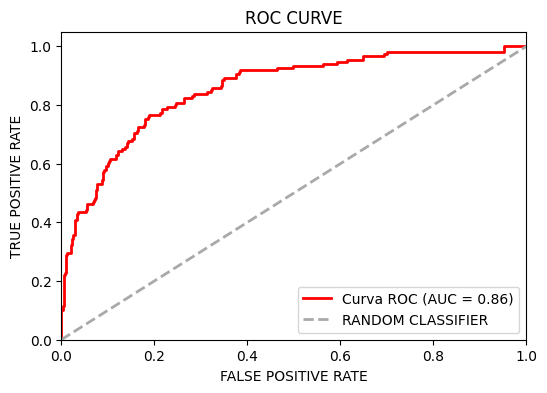

In [94]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(res_rf_gb['y_test'], res_rf_gb['y_pred_prob_test'][:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='red', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--', label='RANDOM CLASSIFIER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()